# Lognormal vs Gaussiana vs Laplace

## Lognormal

Para $\mu = 0$ e $\sigma=1$, tem-se média $m_N = \sqrt{e}$ e desvio padrã $SD = \sqrt{e(e-1)}$.

A FDP é dada por

\begin{eqnarray}
p_N(n) = \dfrac{1}{(n+\sqrt{e})\sqrt{2\pi}}e^{-\dfrac{\ln^2(n+\sqrt{e})}{2}}.
\end{eqnarray}

## Gaussiana

Considerando a média nula e o mesmo desvio padrão da log-normal, $SD = \sqrt{e(e-1)}$, a FDP é,

\begin{eqnarray}
p_N(n) = \dfrac{1}{\sqrt{e(e-1)2\pi}}e^{-\dfrac{n^2}{2e(e-1)}}.
\end{eqnarray}

## Laplace

A FDP da distribuição de Laplace com média nula é

\begin{eqnarray}
p_N(n) = \dfrac{1}{2\lambda}e^{-\dfrac{|n|}{\lambda}}.
\end{eqnarray}

Como $\mathrm{Var}[n] = 2\lambda^2$, tem-se que $\lambda = \dfrac{SD}{\sqrt{2}} = \sqrt{\dfrac{e(e-1)}{2}}$.

## Gráficos

Selecione a próxima célula e pressione *Ctrl + Enter* para gerar os gráficos das PDFs.

Lognormal standard deviation 2.1339596414147257
Gaussian standard deviation 2.1304234341123416
Laplace standard deviation 2.136807885025832


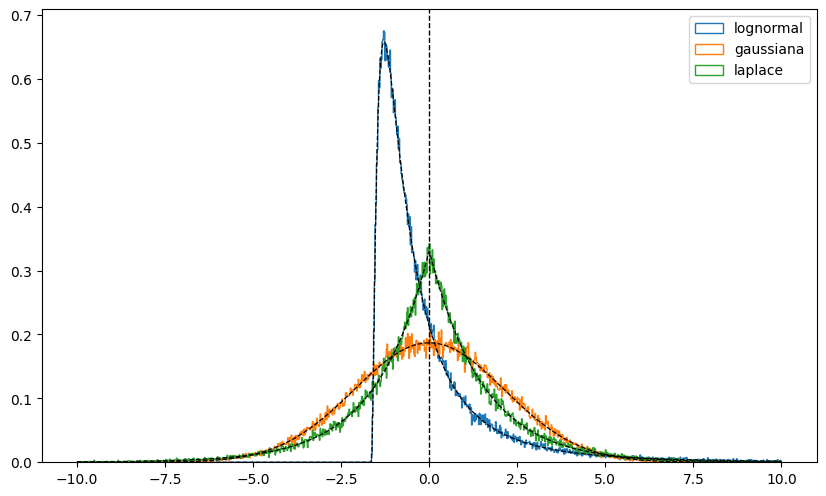

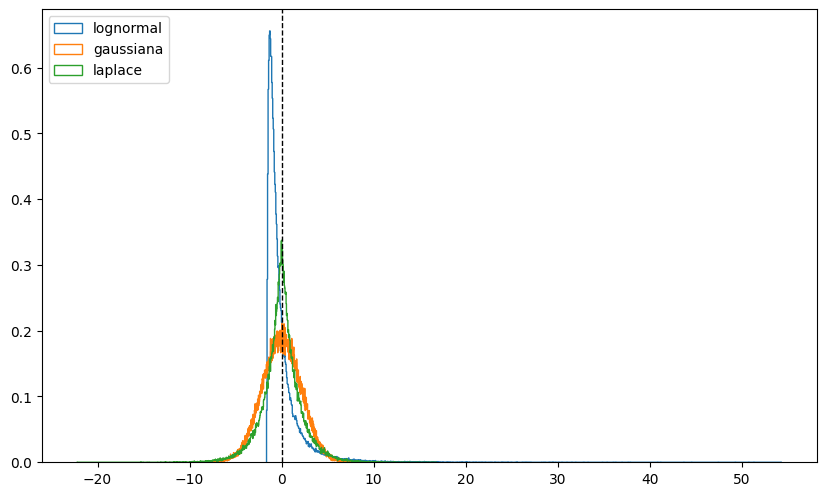

In [15]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 21 11:20:57 2020

@author: Joel Cordeiro
@contact: joelecjr@gmail.com
"""

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Histograms

# RV lognormal
N = 10**5
log_rv = np.random.lognormal(size=N)

# RV normal with same SD
norm_rv = np.random.normal(scale=log_rv.std(), size=N)

# RV laplace
lap_rv = np.random.laplace(scale=(log_rv.std()/np.sqrt(2)), size=N)

print('Lognormal standard deviation {}'.format(log_rv.std()))
print('Gaussian standard deviation {}'.format(norm_rv.std()))
print('Laplace standard deviation {}'.format(lap_rv.std()))

x = np.linspace(-10,10,1000)
pdf_log = st.lognorm.pdf(x,1, loc=-log_rv.mean())
pdf_norm = st.norm.pdf(x, scale=log_rv.std())
pdf_lap = st.laplace.pdf(x, scale=log_rv.std()/np.sqrt(2))

plt.figure(1, figsize=(10,6), dpi=100)
plt.hist(log_rv-log_rv.mean(), bins=1000, range=[-10, 10], density=True, histtype='step', label='lognormal')
plt.hist(norm_rv, bins=1000, range=[-10, 10], density=True, histtype='step', label='gaussiana')
plt.hist(lap_rv, bins=1000, range=[-10, 10], density=True, histtype='step', label='laplace')
plt.plot(x,pdf_log,'--k', x,pdf_norm,'--k', x,pdf_lap,'--k',lw=0.9)
plt.axvline(0, 0, 1, ls='--', color='k',linewidth=1)
plt.legend()
plt.show()

plt.figure(2, figsize=(10,6), dpi= 100)
plt.hist(log_rv-log_rv.mean(), bins=1000, density=True, histtype='step', label='lognormal')
plt.hist(norm_rv, bins=1000, density=True, histtype='step', label='gaussiana')
plt.hist(lap_rv, bins=1000, density=True, histtype='step', label='laplace')
plt.axvline(0, 0, 1, ls='--', color='k',linewidth=1)
plt.legend()
plt.show()
